In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection  import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

In [171]:
df_churn=pd.read_csv("Customer-Churn.csv",header=0,parse_dates=False)

In [172]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [173]:
df_churn.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [174]:
df_churn.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [175]:
df_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [176]:
df_churn.shape

(7043, 21)

In [177]:
df_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [180]:
empty_cols=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
for i in empty_cols:
     df_churn[i]=df_churn[i].replace(" ",np.nan)

In [181]:
df_churn.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [182]:
df_churn=df_churn.dropna()

In [183]:
df_churn.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [184]:
for item in df_churn.columns:
    print(item)
    print (df_churn[item].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (autom

In [185]:
binary_cols=['Partner','Dependents','PhoneService','PaperlessBilling']

for i in binary_cols:
    df_churn[i]=df_churn[i].replace({"Yes":1,"No":0})


df_churn['gender']=df_churn['gender'].replace({"Male":1,"Female":0})

In [186]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,No
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,Yes


In [187]:
category_cols=['PaymentMethod','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract']

for cc in category_cols:
    dummies = pd.get_dummies(df_churn[cc], drop_first=False)
    dummies = dummies.add_prefix("{}#".format(cc))
    df_churn.drop(cc, axis=1, inplace=True)
    df_churn = df_churn.join(dummies)

In [188]:
df_churn.drop('customerID',axis=1,inplace=True)

In [189]:
df_churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'PaymentMethod#Bank transfer (automatic)',
       'PaymentMethod#Credit card (automatic)',
       'PaymentMethod#Electronic check', 'PaymentMethod#Mailed check',
       'MultipleLines#No', 'MultipleLines#No phone service',
       'MultipleLines#Yes', 'InternetService#DSL',
       'InternetService#Fiber optic', 'InternetService#No',
       'OnlineSecurity#No', 'OnlineSecurity#No internet service',
       'OnlineSecurity#Yes', 'OnlineBackup#No',
       'OnlineBackup#No internet service', 'OnlineBackup#Yes',
       'DeviceProtection#No', 'DeviceProtection#No internet service',
       'DeviceProtection#Yes', 'TechSupport#No',
       'TechSupport#No internet service', 'TechSupport#Yes', 'StreamingTV#No',
       'StreamingTV#No internet service', 'StreamingTV#Yes',
       'StreamingMovies#No', 'StreamingMovies#No internet service',


In [190]:
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport#Yes,StreamingTV#No,StreamingTV#No internet service,StreamingTV#Yes,StreamingMovies#No,StreamingMovies#No internet service,StreamingMovies#Yes,Contract#Month-to-month,Contract#One year,Contract#Two year
0,0,0,1,0,1,0,1,29.85,29.85,No,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,56.95,1889.5,No,...,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,2,1,1,53.85,108.15,Yes,...,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,No,...,1,1,0,0,1,0,0,0,1,0
4,0,0,0,0,2,1,1,70.70,151.65,Yes,...,0,1,0,0,1,0,0,1,0,0


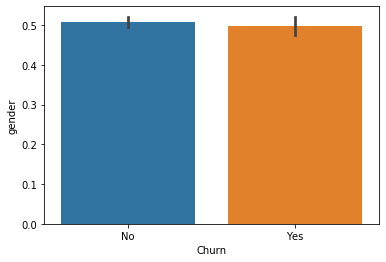

In [192]:
sns.barplot(x="Churn",y="gender",data=df_churn)
plt.show()

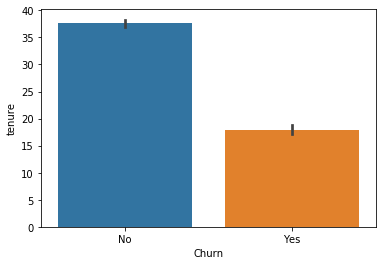

In [193]:
sns.barplot(x="Churn",y="tenure",data=df_churn)
plt.show()

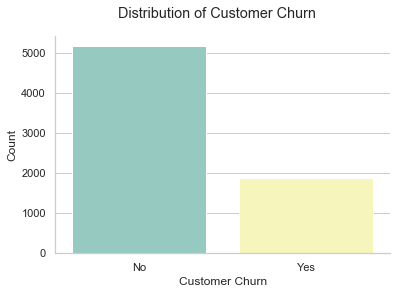

In [194]:
from matplotlib.pyplot import suptitle
from seaborn import despine

sns.set(style="whitegrid")

ax=sns.countplot(x='Churn',palette="Set3", data=df_churn)
ax.set_xticklabels(["No","Yes"])
ax.set_ylabel("Count")
ax.set_xlabel("Customer Churn")
suptitle("Distribution of Customer Churn")
despine()

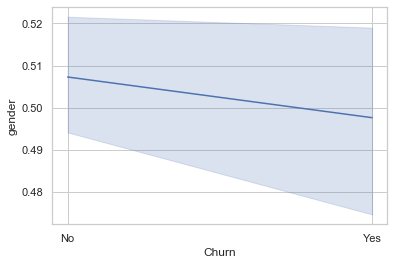

In [195]:
sns.lineplot(x="Churn",y="gender",data=df_churn)
plt.show()

In [196]:
df_churn['Churn']=df_churn['Churn'].replace({"Yes":1,"No":0})

In [197]:
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport#Yes,StreamingTV#No,StreamingTV#No internet service,StreamingTV#Yes,StreamingMovies#No,StreamingMovies#No internet service,StreamingMovies#Yes,Contract#Month-to-month,Contract#One year,Contract#Two year
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,56.95,1889.5,0,...,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,1,0,0,1,0,0,0,1,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,1,0,0,1,0,0,1,0,0


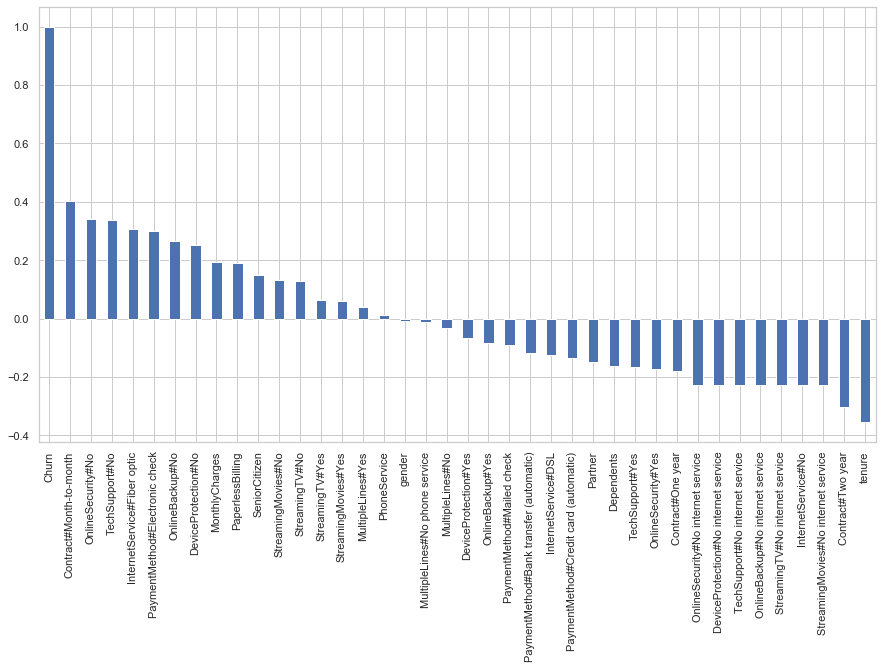

In [198]:
 plt.figure(figsize=(15,8))
df_churn.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [199]:
df_churn.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,PaymentMethod#Bank transfer (automatic),...,TechSupport#Yes,StreamingTV#No,StreamingTV#No internet service,StreamingTV#Yes,StreamingMovies#No,StreamingMovies#No internet service,StreamingMovies#Yes,Contract#Month-to-month,Contract#One year,Contract#Two year
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.011902,-0.013779,-0.008545,-0.015973,...,-0.008507,0.003088,0.004745,-0.007124,0.006078,0.004745,-0.010105,-0.003251,0.007755,-0.003603
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.156258,0.219874,0.150541,-0.016235,...,-0.060577,0.048664,-0.182519,0.105445,0.034196,-0.182519,0.119842,0.137752,-0.046491,-0.116205
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,-0.013957,0.097825,-0.149982,0.111406,...,0.120206,-0.123394,-0.000286,0.124483,-0.117488,-0.000286,0.118108,-0.280202,0.083067,0.247334
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.110131,-0.112343,-0.163128,0.052369,...,0.063053,-0.099912,0.138383,-0.016499,-0.078245,0.138383,-0.038375,-0.229715,0.069222,0.201699
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.004823,0.246862,-0.354049,0.243822,...,0.325288,-0.246814,-0.037529,0.280264,-0.252890,-0.037529,0.285402,-0.649346,0.202338,0.563801
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.016696,0.248033,0.011691,0.008271,...,-0.095138,-0.123159,0.171817,-0.021383,-0.111273,0.171817,-0.033477,-0.001243,-0.003142,0.004442
PaperlessBilling,-0.011902,0.156258,-0.013957,-0.110131,0.004823,0.016696,1.000000,0.351930,0.191454,-0.017469,...,0.037536,0.046715,-0.320592,0.224241,0.058987,-0.320592,0.211583,0.168296,-0.052278,-0.146281
MonthlyCharges,-0.013779,0.219874,0.097825,-0.112343,0.246862,0.248033,0.351930,1.000000,0.192858,0.042410,...,0.338301,0.016015,-0.763191,0.629668,0.017271,-0.763191,0.627235,0.058933,0.004810,-0.073256
Churn,-0.008545,0.150541,-0.149982,-0.163128,-0.354049,0.011691,0.191454,0.192858,1.000000,-0.118136,...,-0.164716,0.128435,-0.227578,0.063254,0.130920,-0.227578,0.060860,0.404565,-0.178225,-0.301552
PaymentMethod#Bank transfer (automatic),-0.015973,-0.016235,0.111406,0.052369,0.243822,0.008271,-0.017469,0.042410,-0.118136,1.000000,...,0.100472,-0.044887,-0.001094,0.046121,-0.047677,-0.001094,0.048755,-0.180159,0.057629,0.155004


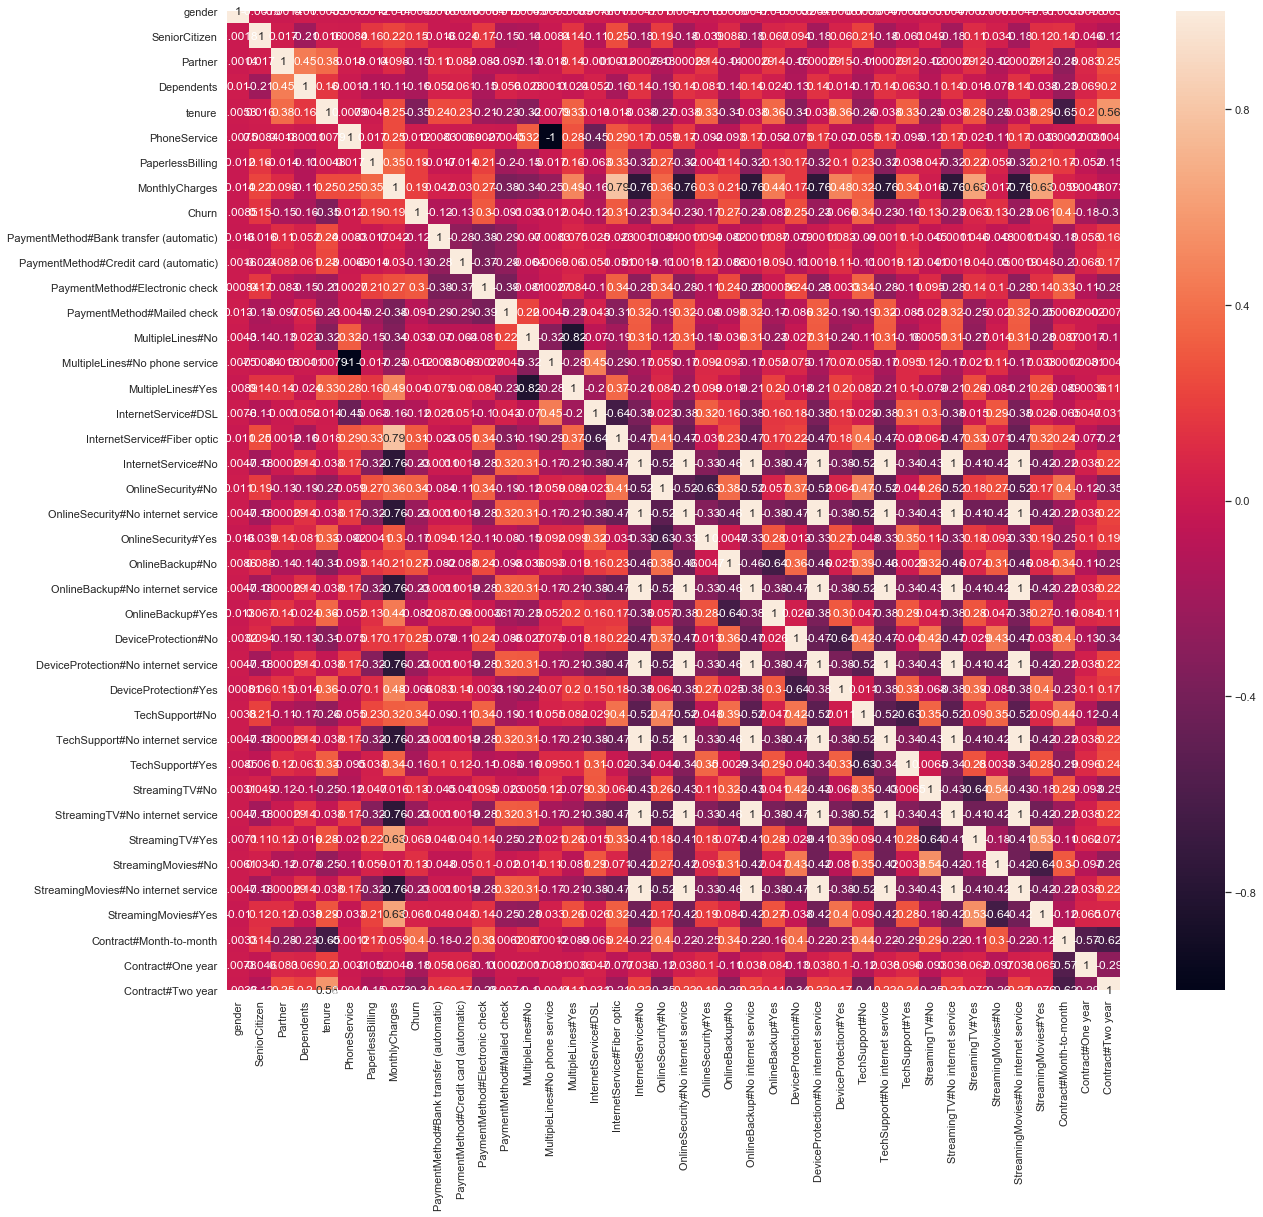

In [201]:
plt.figure(figsize=(20,18))
sns.heatmap(df_churn.corr(),annot=True)

In [260]:
x=df_churn.drop(columns=["Churn"])
y=df_churn[["Churn"]]

In [261]:
 x_train, x_test,y_train,y_test = train_test_split(x,y,random_state = 65,test_size=0.30)

In [262]:
x_train.shape

(4922, 40)

In [263]:
x_test.shape

(2110, 40)

In [264]:
y_train.shape

(4922, 1)

In [265]:
y_test.shape

(2110, 1)

In [266]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:2]

array([[-1.00943013, -0.44032709,  1.03561683, -0.65230493, -1.28024804,
        -3.05633383,  0.82893915, -1.16169394, -0.99419409, -0.52997577,
        -0.5253508 ,  1.40476387, -0.54360352, -0.96341068,  3.05633383,
        -0.85433559,  1.38224311, -0.88689648, -0.52513044,  1.00541855,
        -0.52513044, -0.63374636, -0.88459567, -0.52513044,  1.37833008,
         1.12817819, -0.52513044, -0.72391796,  1.01259351, -0.52513044,
        -0.63926039,  1.22612478, -0.52513044, -0.79018582,  1.23636032,
        -0.52513044, -0.79684918,  0.9026127 , -0.51453688, -0.56136439],
       [ 0.99065797, -0.44032709, -0.9656081 , -0.65230493,  0.06430269,
         0.32718939, -1.20636117, -0.26087792, -0.17373982, -0.52997577,
        -0.5253508 , -0.71186341,  1.83957601,  1.03797895, -0.32718939,
        -0.85433559,  1.38224311, -0.88689648, -0.52513044, -0.99461065,
        -0.52513044,  1.57791834,  1.13045997, -0.52513044, -0.72551562,
        -0.8863848 , -0.52513044,  1.38137199,  1.

In [267]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
lg=LogisticRegression()

In [268]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [269]:
lg.score(x_train,y_train)

0.8071921982933766

In [270]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
import sklearn.metrics as metrics
predicted = cross_val_predict(lg, x, y, cv=10)
metrics.accuracy_score(y, predicted) 

from sklearn.model_selection import cross_validate
accuracy = cross_val_score(lg, x, y, cv=10,scoring='accuracy')
print (accuracy)
print (cross_val_score(lg, x, y, cv=10,scoring='accuracy').mean())

[0.796875   0.80965909 0.80512091 0.82076814 0.78378378 0.79658606
 0.81507824 0.81081081 0.79943101 0.80796586]
0.8046078898874951


In [271]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(lg, x, y, cv=10, scoring='accuracy').mean())

0.8046078898874951


In [272]:
pred=lg.predict(x_test)
print(pred)

[1 1 0 ... 0 0 0]


In [273]:
print("accuracy_score",accuracy_score(pred,y_test))

accuracy_score 0.7007818052594172


In [274]:
print(confusion_matrix(y_test,pred))

[[673 348]
 [ 73 313]]


In [275]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(dt.score(x_test,y_test)*100,2)))

Test Accuracy: 72.35%


In [276]:
from sklearn.externals import joblib
joblib.dump(lg, "lg_customerchurn.pk1")

['lg_customerchurn.pk1']